In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('../data/players_18.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,64+3,59+3,59+3,59+3,64+3,60+3,47+3,47+3,47+3,60+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,30,1987-01-24,182,86,Uruguay,FC Barcelona,...,68+4,66+4,66+4,66+4,68+4,65+4,59+4,59+4,59+4,65+4


In [3]:
# Drop the Goalkeepers beacuse they lack a lot of variables

df = df.loc[df['player_positions']!='GK']
df['player_positions'].value_counts()

CB                  2167
ST                  1808
LB                   738
CM                   728
CDM, CM              642
                    ... 
CM, LWB, RB, CDM       1
LM, CM, CDM            1
RW, LW, CAM, RM        1
LW, RW, ST, LM         1
CAM, RW, LM, ST        1
Name: player_positions, Length: 795, dtype: int64

In [4]:
df = df [['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions', 'mentality_composure',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

In [5]:
df20 = pd.read_csv('../data/players_20.csv')
df20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
df20 = df20[['sofifa_id', 'overall']]

In [7]:
df20.columns = ['sofifa_id', 'overall_20']

In [8]:
df1820 = df.merge(df20, on='sofifa_id')
df1820.shape

(9587, 70)

In [9]:
df1820.isna().sum()

sofifa_id     0
age           0
height_cm     0
weight_kg     0
overall       0
             ..
lcb           0
cb            0
rcb           0
rb            0
overall_20    0
Length: 70, dtype: int64

In [10]:
df1820.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9587 entries, 0 to 9586
Data columns (total 70 columns):
sofifa_id                     9587 non-null int64
age                           9587 non-null int64
height_cm                     9587 non-null int64
weight_kg                     9587 non-null int64
overall                       9587 non-null int64
potential                     9587 non-null int64
value_eur                     9587 non-null int64
wage_eur                      9587 non-null int64
pace                          9587 non-null float64
shooting                      9587 non-null float64
passing                       9587 non-null float64
dribbling                     9587 non-null float64
defending                     9587 non-null float64
physic                        9587 non-null float64
attacking_crossing            9587 non-null object
attacking_finishing           9587 non-null object
attacking_heading_accuracy    9587 non-null object
attacking_short_passing     

In [11]:
# A lot of numerical varaibles are formatted as strings because they contain signs + or -

objects = df1820.select_dtypes(['object'])
objects.columns

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_composure', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [12]:
# defining a function to get the number before the sign (+ or -)

def get_value(x):
    if '+' in x:
        return x.split('+')[0]
    elif '-' in x:
        return x.split('-')[0]
    else:
        return x

In [13]:
# applying the function to all the columns with values as strings with + or -

cols = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_composure', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
    
for col in cols:
    df1820[col] = df1820[col].apply(get_value)
    df1820[col] = pd.to_numeric(df1820[col])

In [14]:
df1820.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9587 entries, 0 to 9586
Data columns (total 70 columns):
sofifa_id                     9587 non-null int64
age                           9587 non-null int64
height_cm                     9587 non-null int64
weight_kg                     9587 non-null int64
overall                       9587 non-null int64
potential                     9587 non-null int64
value_eur                     9587 non-null int64
wage_eur                      9587 non-null int64
pace                          9587 non-null float64
shooting                      9587 non-null float64
passing                       9587 non-null float64
dribbling                     9587 non-null float64
defending                     9587 non-null float64
physic                        9587 non-null float64
attacking_crossing            9587 non-null int64
attacking_finishing           9587 non-null int64
attacking_heading_accuracy    9587 non-null int64
attacking_short_passing       9

In [ ]:
# Now all fetures are numerical

In [15]:
# Finding 2018 features that better correlate with overall_20 (target variable)

a = df1820.corr()['overall_20'].sort_values(ascending=False)[1:]
correlations_df = pd.DataFrame(a)
correlations_df.head(10)

,overall_20
overall,0.831948
movement_reactions,0.696010
potential,0.685208
value_eur,0.647995
mentality_composure,0.642063
lcm,0.640721
rcm,0.640721
cm,0.640721
skill_ball_control,0.614332
attacking_short_passing,0.608375


In [25]:
# List of variables that correlate better than 0.1 (from overall to age)

best_corr = correlations_df.loc[correlations_df['overall_20'] >= 0.1]
print(list(best_corr.index))

['overall', 'movement_reactions', 'potential', 'value_eur', 'mentality_composure', 'lcm', 'rcm', 'cm', 'skill_ball_control', 'attacking_short_passing', 'wage_eur', 'ls', 'rs', 'st', 'lm', 'rm', 'cam', 'lam', 'ram', 'passing', 'rf', 'cf', 'lf', 'lw', 'rw', 'dribbling', 'rwb', 'lwb', 'skill_long_passing', 'power_shot_power', 'cdm', 'ldm', 'rdm', 'skill_dribbling', 'mentality_vision', 'lb', 'rb', 'power_long_shots', 'skill_curve', 'shooting', 'attacking_crossing', 'attacking_volleys', 'mentality_positioning', 'skill_fk_accuracy', 'attacking_heading_accuracy', 'physic', 'mentality_penalties', 'power_stamina', 'attacking_finishing', 'mentality_aggression', 'lcb', 'rcb', 'cb', 'age', 'mentality_interceptions', 'power_strength', 'movement_agility', 'defending', 'pace', 'movement_sprint_speed', 'defending_standing_tackle', 'movement_acceleration', 'power_jumping', 'defending_marking', 'defending_sliding_tackle', 'weight_kg']


### Select k best features

In [26]:
# We want to find 10 best features

from sklearn.feature_selection import SelectKBest, f_regression

def select_kbest_clf(data_frame, target, k=10):
   
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["p_value"] = feat_selector.pvalues_
    feat_scores["k_first"] = feat_selector.get_support()
    feat_scores["variable"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores.loc[feat_scores['k_first']==True] 

select_kbest_clf(df1820, 'overall_20', k=10)


,F Score,p_value,k_first,variable
4,21549.107127,0.0,True,overall
5,8483.198025,0.0,True,potential
6,6937.944236,0.0,True,value_eur
17,5632.189576,0.0,True,attacking_short_passing
23,5810.225186,0.0,True,skill_ball_control
27,9006.078541,0.0,True,movement_reactions
36,6722.797495,0.0,True,mentality_composure
55,6675.178927,0.0,True,lcm
56,6675.178927,0.0,True,cm
57,6675.178927,0.0,True,rcm


In [27]:
top10corr = ['overall', 'movement_reactions', 'potential', 'value_eur', 'mentality_composure', 'lcm', 'rcm', 'cm',
             'skill_ball_control', 'attacking_short_passing']

# the 10 best features extracted by kbest are the same as the top 10 variables correlating with overall_20

In [28]:
# To create our model we keep those 10 features

df_ml = df1820[['overall', 'movement_reactions', 'potential', 'value_eur', 'mentality_composure', 'lcm', 'rcm', 'cm',
             'skill_ball_control', 'attacking_short_passing', 'overall_20']]

In [29]:
df_ml.isna().sum()

overall                    0
movement_reactions         0
potential                  0
value_eur                  0
mentality_composure        0
lcm                        0
rcm                        0
cm                         0
skill_ball_control         0
attacking_short_passing    0
overall_20                 0
dtype: int64

## Train-test split

In [21]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(columns='overall_20')
y = df_ml['overall_20']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

print('R-squared Train: ', r2_score(y_train, y_pred))
print('Mean Absolute Error Train: ', mean_absolute_error(y_train, y_pred), '\n')

y_pred_test = lr.predict(X_test)

print('R-squared Test: ', r2_score(y_test, y_pred_test))
print('Mean Absolute Error Test: ', mean_absolute_error(y_test, y_pred_test), '\n')
print('Root Mean Squared Error Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)), '\n')




R-squared Train:  0.7274198315607057
Mean Absolute Error Train:  2.3723933731320748 

R-squared Test:  0.7234084714495601
Mean Absolute Error Test:  2.405504167428739 

Root Mean Squared Error Test:  3.0873002918698633 



In [30]:
# Calculating RMSE in proportion to the mean of overall_20

rmse =  np.sqrt(mean_squared_error(y_test, y_pred_test))
target_mean = df1820.overall_20.mean()
print('RMSE vs target mean: ', (100*rmse/target_mean), '%')

RMSE vs target mean:  4.452399332418178 %


In [31]:
# Comparing predicted values with our model to actual values

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

results = results.head(25)
results

,Actual,Predicted
3986,75,71.006217
7767,69,65.544166
3828,67,69.665555
8830,58,64.209549
558,77,78.058725
1726,72,73.310054
7503,63,65.058918
7361,67,66.239015
8449,66,64.139265
7620,63,64.239590


<Figure size 864x504 with 0 Axes>

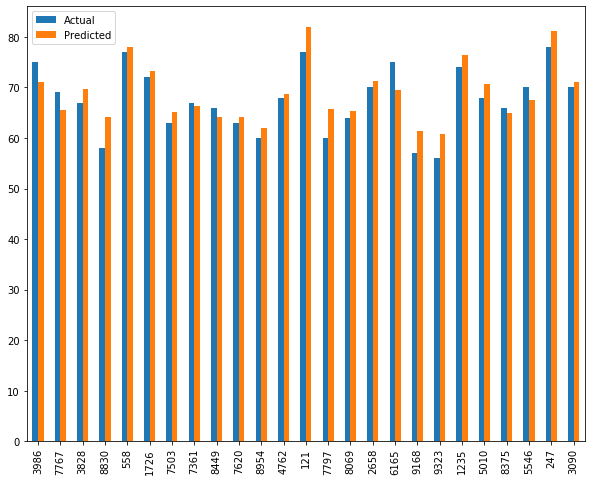

In [32]:
# Comparing predicted values with our model to actual values

plt.figure(figsize=(12,7))
results.plot(kind='bar',figsize=(10,8))
plt.show()

## Applying the model to FIFA 20 to predict overall 2023

In [33]:
df2020 = pd.read_csv('../data/players_20.csv')
df2020.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [34]:
# Drop the Goalkeepers

df2020 = df2020.loc[df2020['player_positions']!='GK']
df2020['player_positions'].value_counts()

CB             2322
ST             1809
CM              786
CDM, CM         731
CM, CDM         682
               ... 
CF, RM, CM        1
RW, CM, LB        1
RM, CB, RB        1
RM, ST, CM        1
RM, RB, CDM       1
Name: player_positions, Length: 642, dtype: int64

In [35]:
objects = df2020.select_dtypes(['object'])
objects.columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [36]:
# defining a function to get the number before the sign (+ or -)

def get_value(x):
    if '+' in x:
        return x.split('+')[0]
    elif '-' in x:
        return x.split('-')[0]
    else:
        return x
    
# applying the function to all the columns with values as strings with + or -

cols = ['lcm', 'rcm', 'cm']
    
for col in cols:
    df2020[col] = df2020[col].apply(get_value)
    df2020[col] = pd.to_numeric(df2020[col])

In [37]:
df_ml2023 = df2020[['overall', 'movement_reactions', 'potential', 'value_eur', 'mentality_composure', 'lcm', 'rcm', 'cm',
             'skill_ball_control', 'attacking_short_passing']]

In [38]:
df_ml2023.isna().sum()

overall                    0
movement_reactions         0
potential                  0
value_eur                  0
mentality_composure        0
lcm                        0
rcm                        0
cm                         0
skill_ball_control         0
attacking_short_passing    0
dtype: int64

In [39]:
y_pred_2023 = lr.predict(df_ml2023)

In [40]:
# New dataframe containing predictions

predictions_df = pd.DataFrame()
predictions_df['sofifa_id'] = df2020['sofifa_id']
predictions_df['name'] = df2020['short_name']
predictions_df['overall_2020'] = df2020['overall']
predictions_df['predicted_overall_2022'] = y_pred_2023

In [41]:
predictions_df.head(25)

,sofifa_id,name,overall_2020,predicted_overall_2022
0,158023,L. Messi,94,95.604565
1,20801,Cristiano Ronaldo,93,91.681438
2,190871,Neymar Jr,92,94.974208
4,183277,E. Hazard,91,92.948926
5,192985,K. De Bruyne,91,92.862711
7,203376,V. van Dijk,90,91.058911
8,177003,L. Modrić,90,88.374404
9,209331,M. Salah,90,91.286722
10,231747,K. Mbappé,89,92.907633
11,201024,K. Koulibaly,89,89.643247


In [43]:
#predictions_df.to_csv('../data/predictions_2022.csv', index=False)